# 决策树

In [1]:
from math import log

## 计算香农熵

In [2]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    return shannonEnt

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels

In [4]:
myDat, labels = createDataSet()
myDat, labels

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [5]:
calcShannonEnt(myDat)

0.9709505944546686

若香农熵越高，则混合的数据越多。这里我们增加第三个名为 maybe 的分类，测试熵的变化

In [6]:
myDat[0][-1] = 'maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
calcShannonEnt(myDat)

1.3709505944546687

## 划分数据集

将 dataSet 中所有数据，按照第 axis 列数据进行分类，若第 axis 列的值等于 value，则保存该条数据，  
最后返回此类数据集合。

In [8]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]  # chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [9]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

下面按照数据集中第一个特征变量进行分类，即“不浮出水面是否可以生存”项，  
若为“是”，则保存该条数据到结果集合中，最后返回。

In [10]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [11]:
splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

## 寻找最好划分数据集方式

In [12]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1  # the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0  # 信息增益 information gain
    bestFeature = -1
    for i in range(numFeatures):  # iterate over all the features
        featList = [example[i] for example in dataSet]  # create a list of all the examples of this feature
        uniqueVals = set(featList)  # get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):  # compare this to the best gain so far
            bestInfoGain = infoGain  # if better than current best, set to best
            bestFeature = i
    return bestFeature  # returns an integer

In [13]:
myDat, labels = createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [14]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [15]:
import operator
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [16]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):  # stop splitting when all of the classes are equal
        return classList[0]  
    if len(dataSet[0]) == 1:  # stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]  # copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [17]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 使用 Matplotlib 注解绘制树形图

## Matplotlib 注解
Matplotlib 提供了一个注解工具 annotation，它可以在数据图形上添加文本注解。

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100

In [19]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

def createPlot():
   fig = plt.figure(1, facecolor='white')
   fig.clf()
   createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
   plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
   plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
   plt.show()

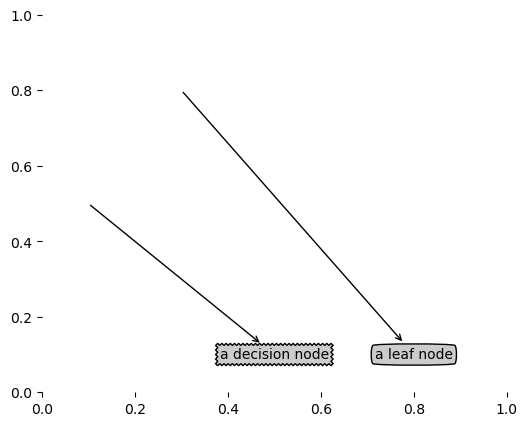

In [20]:
createPlot()

# 构造注解树
## 获取叶节点的数目和树的层数

In [21]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [22]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                   ]
    return listOfTrees[i]

In [23]:
retrieveTree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [24]:
getNumLeafs(myTree)

3

In [25]:
getTreeDepth(myTree)

2

## plotTree 函数

In [26]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):  # if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  # this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]  # the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':  # test to see if the nodes are dictonaires, if not they are leaf nodes
            plotTree(secondDict[key], cntrPt, str(key))  # recursion
        else:  # it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # no ticks
    # createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

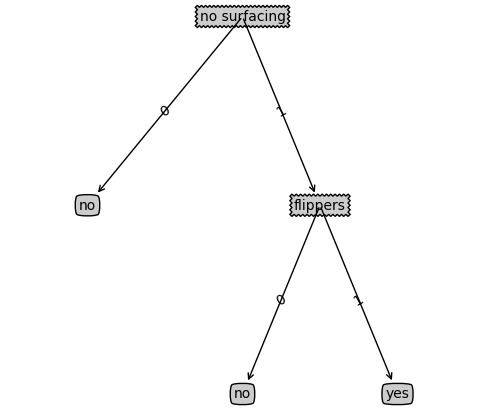

In [27]:
createPlot(myTree)

In [28]:
myTree['no surfacing'][3] = 'maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

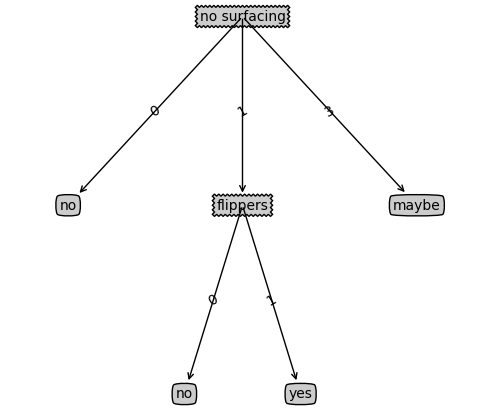

In [29]:
createPlot(myTree)

# 测试和存储分类器

## 测试算法：使用决策树执行分类

In [30]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [31]:
myDat, labels = createDataSet()
retrieveTree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [32]:
classify(myTree, labels, [1, 0])

'no'

In [33]:
classify(myTree, labels, [1, 1])

'yes'

## 使用算法：决策树的存储

In [34]:
import pickle

def storeTree(inputTree, filename):
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()


def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [35]:
storeTree(myTree, 'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

# 示例：使用决策树预测隐形眼镜类型

In [36]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'pre': 'soft',
      'young': 'soft'}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}}}}}},
  'reduced': 'no lenses'}}

## 建立可视化决策树

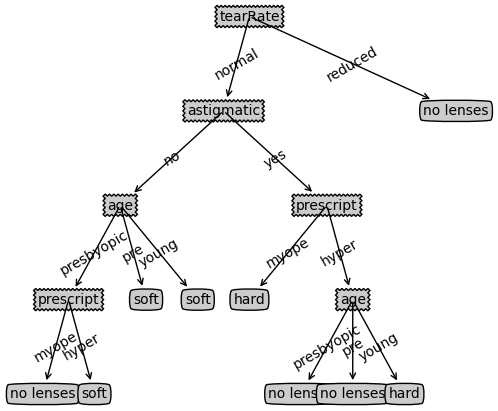

In [37]:
createPlot(lensesTree)